<a href="https://colab.research.google.com/github/claudiobalique/Challenge-Telecom-X/blob/main/challenge_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [1]:
import pandas as pd

# URL do arquivo JSON
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'

# Carregando os dados do JSON
dados_telecom_x = pd.read_json(url)

# Expandindo as colunas que contêm subdados em dicionários
colunas_para_normalizar = ['customer', 'phone', 'internet', 'account']

for coluna in colunas_para_normalizar:
    if coluna in dados_telecom_x.columns:
        dados_expandido = pd.json_normalize(dados_telecom_x[coluna])
        dados_telecom_x = dados_telecom_x.drop(columns=[coluna]).join(dados_expandido, rsuffix=f'_{coluna}')
    else:
        print(f"A coluna '{coluna}' não foi encontrada no conjunto de dados.")

# Exibindo as primeiras linhas do dataframe tratado
dados_telecom_x.head()

# prompt: exportar o dataset acima para o format csv
# Utilizei essa opção para melhor estudar os dados
#dados_telecom_x.to_csv('dados_telecom_x.csv', index=False)



,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# **Conhecendo o Dataset**

O data set é formado pelos seguintes atributos:

customerID: número de identificação único de cada cliente

Churn: se o cliente deixou ou não a empresa

gender: gênero (masculino e feminino)

SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos

Partner: se o cliente possui ou não um parceiro ou parceira

Dependents: se o cliente possui ou não dependentes

tenure: meses de contrato do cliente

PhoneService: assinatura de serviço telefônico

MultipleLines: assisnatura de mais de uma linha de telefone

InternetService: assinatura de um provedor internet

OnlineSecurity: assinatura adicional de segurança online

OnlineBackup: assinatura adicional de backup online

DeviceProtection: assinatura adicional de proteção no dispositivo

TechSupport: assinatura adicional de suporte técnico, menos tempo de espera

StreamingTV: assinatura de TV a cabo

StreamingMovies: assinatura de streaming de filmes

Contract: tipo de contrato

PaperlessBilling: se o cliente prefere receber online a fatura

PaymentMethod: forma de pagamento

Charges.Monthly: total de todos os serviços do cliente por mês

Charges.Total: total gasto pelo cliente

# COLUNAS MAIS RELEVANTES PARA ANALISE DE DADOS DE EVASÃO DE CLIENTE.

Churn: se o cliente deixou ou não a empresa

InternetService: assinatura de um provedor internet

Charges.Monthly: total de todos os serviços do cliente por mês

Charges.Total  - total gasto pelo cliente




O arquivo jon

#🔧 Transformação

In [2]:
# Bibliotecas
import pandas as pd

# ACERTAR OS DADOS DOS ATRIBUTOS que deveriam ter informações 'no' ou 'Yes'
# multipleLines alterar de 'No phone service' para 'no'
# OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies alterar de 'No internet service' para 'no'
#Transformando a coluna SeniorCitizen para string para depois substituir por No e Yes e depois transforma-lo em boleano
dados_telecom_x['SeniorCitizen'] = dados_telecom_x['SeniorCitizen'].astype('string')
dados_telecom_x['MultipleLines'] = dados_telecom_x['MultipleLines'].replace('No phone service', 'No')
dados_telecom_x['OnlineSecurity'] = dados_telecom_x['OnlineSecurity'].replace('No internet service', 'No')
dados_telecom_x['OnlineBackup'] = dados_telecom_x['OnlineBackup'].replace('No internet service', 'No')
dados_telecom_x['DeviceProtection'] = dados_telecom_x['DeviceProtection'].replace('No internet service', 'No')
dados_telecom_x['TechSupport'] = dados_telecom_x['TechSupport'].replace('No internet service', 'No')
dados_telecom_x['StreamingTV'] = dados_telecom_x['StreamingTV'].replace('No internet service', 'No')
dados_telecom_x['StreamingMovies'] = dados_telecom_x['StreamingMovies'].replace('No internet service', 'No')
dados_telecom_x['SeniorCitizen'] = dados_telecom_x['SeniorCitizen'].replace('0', 'No')
dados_telecom_x['SeniorCitizen'] = dados_telecom_x['SeniorCitizen'].replace('1', 'Yes')

# Preencher valores '' na coluna 'Churn' com 'No'
dados_telecom_x['Churn'] = dados_telecom_x['Churn'].replace('', 'No')



# TRANSFORMAR OS ATRIBUTOS  SeniorCitizen, Churn, Partner, Dependents, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling  EM BOLEANOS(TRUE OU FALSE)
for col in ['SeniorCitizen','Churn', 'MultipleLines', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies','PaperlessBilling']:
    dados_telecom_x[col] = dados_telecom_x[col].map({'Yes': True, 'No': False})

# Transformar os atributos customerID, gender,InternetService,Contract, PaymentMethod  para string
dados_telecom_x['customerID'] = dados_telecom_x['customerID'].astype('string')
dados_telecom_x['gender'] = dados_telecom_x['gender'].astype('string')
dados_telecom_x['InternetService'] = dados_telecom_x['InternetService'].astype('string')
dados_telecom_x['Contract'] = dados_telecom_x['Contract'].astype('string')
dados_telecom_x['PaymentMethod'] = dados_telecom_x['PaymentMethod'].astype('string')

# Transformar o atributo tenure  para int
dados_telecom_x['tenure'] = dados_telecom_x['tenure'].astype(int)

# Transformar os atributos Charges.Monthly e Charges.Total  para float.

dados_telecom_x['Charges.Monthly'] = pd.to_numeric(dados_telecom_x['Charges.Monthly'], errors='coerce')
dados_telecom_x['Charges.Total'] = pd.to_numeric(dados_telecom_x['Charges.Total'], errors='coerce')

# Exibir informações para verificar os tipos de dados após as transformações
dados_telecom_x.info()

# Exibir as primeiras linhas para verificar os valores
dados_telecom_x.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   string 
 1   Churn             7267 non-null   bool   
 2   gender            7267 non-null   string 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   bool   
 9   InternetService   7267 non-null   string 
 10  OnlineSecurity    7267 non-null   bool   
 11  OnlineBackup      7267 non-null   bool   
 12  DeviceProtection  7267 non-null   bool   
 13  TechSupport       7267 non-null   bool   
 14  StreamingTV       7267 non-null   bool   
 15  StreamingMovies   7267 non-null   bool   
 16  Contract          7267 non-null   string 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,...,True,False,True,True,False,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,...,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40


#📊 Carga e análise

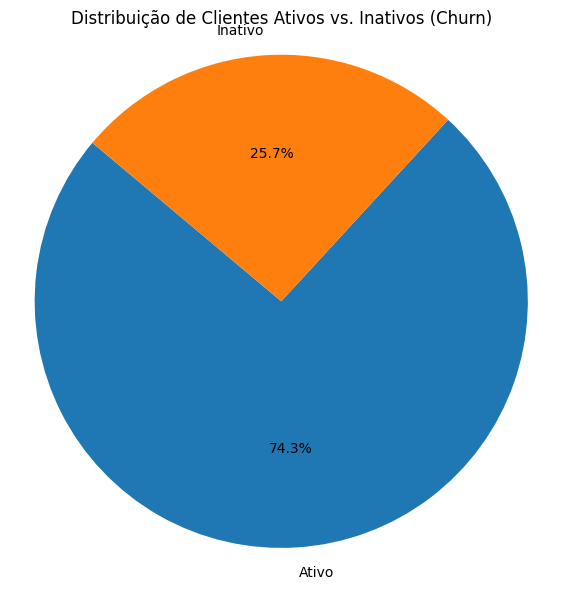

In [3]:
# Gráfico de  pizza para visualizar o percentual de clientes que permaneceram(Churn=True) e os que saíram(Churn=True).

import matplotlib.pyplot as plt
# Contar a quantidade de clientes por Churn
churn_counts = dados_telecom_x['Churn'].value_counts()

# Renomear os rótulos para o gráfico
labels = ['Ativo' if x == False else 'Inativo' for x in churn_counts.index]

# Criar o gráfico de pizza
plt.figure(figsize=(7, 7))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Clientes Ativos vs. Inativos (Churn)')
plt.axis('equal')  # Garante que o gráfico seja um círculo.
plt.show()

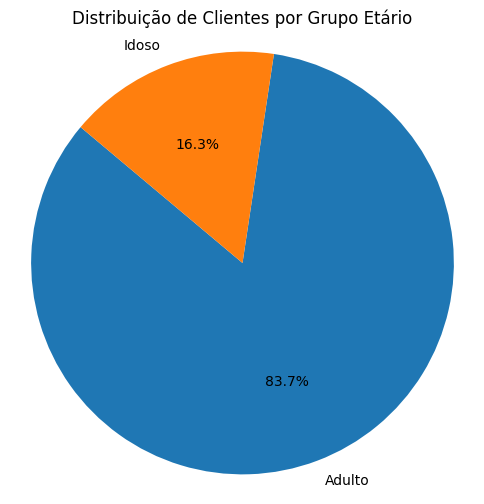

In [4]:
#gráfico de pizza com o atributo SeniorCitizen(grupo etário). substituir o valor true por idos e false por adulto

import matplotlib.pyplot as plt

# Replace boolean values with strings
dados_telecom_x['SeniorCitizen_label'] = dados_telecom_x['SeniorCitizen'].replace({True: 'Idoso', False: 'Adulto'})

# Calculate the counts for each group
senior_citizen_counts = dados_telecom_x['SeniorCitizen_label'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(senior_citizen_counts, labels=senior_citizen_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Clientes por Grupo Etário')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Análise descritiva de Charges.Monthly por GrupoEtario:
              count       mean        std    min    25%     50%     75%  \
GrupoEtario                                                               
Adulto       6085.0  61.793730  30.357648  18.25  25.55  65.650  86.800   
Idoso        1182.0  79.785195  23.795327  18.95  70.10  84.825  98.075   

                max  
GrupoEtario          
Adulto       118.75  
Idoso        117.45  


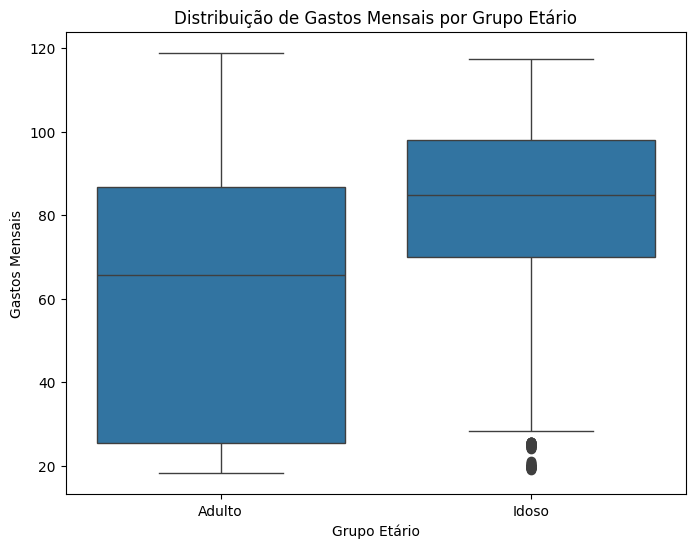

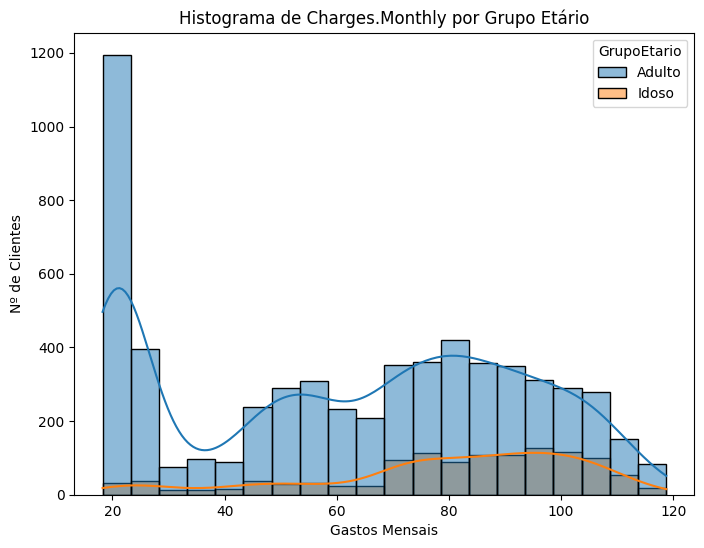

In [5]:
# Análise descritiva entre GrupoEtario e Charges.Monthly com construção de gráfico boxplot e colunas

# Mapear os valores da coluna SeniorCitizen
dados_telecom_x['GrupoEtario'] = dados_telecom_x['SeniorCitizen'].map({True: 'Idoso', False: 'Adulto'})

print("Análise descritiva de Charges.Monthly por GrupoEtario:")
print(dados_telecom_x.groupby('GrupoEtario')['Charges.Monthly'].describe())

# Visualização (opcional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='GrupoEtario', y='Charges.Monthly', data=dados_telecom_x)
plt.title('Distribuição de Gastos Mensais por Grupo Etário')
plt.xlabel('Grupo Etário')
plt.ylabel('Gastos Mensais')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=dados_telecom_x, x='Charges.Monthly', hue='GrupoEtario', kde=True, bins=20)
plt.title('Histograma de Charges.Monthly por Grupo Etário')
plt.xlabel('Gastos Mensais')
plt.ylabel('Nº de Clientes')
plt.show()

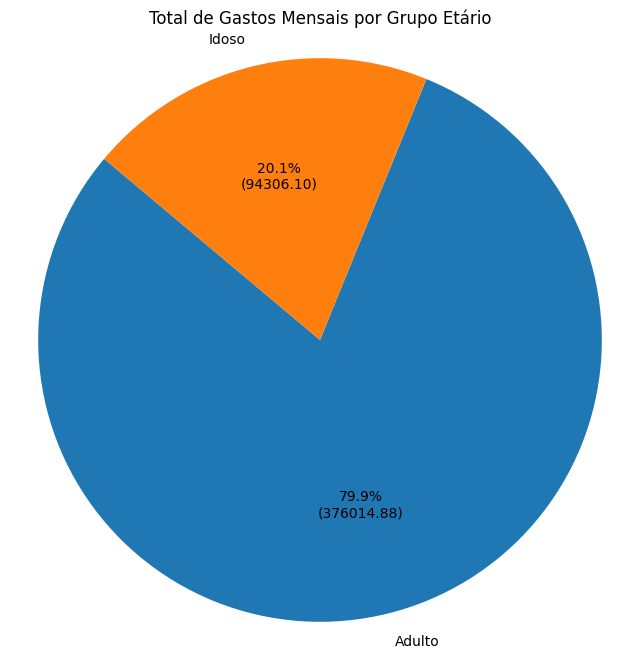

In [6]:
# gráfico de pizza totalizando o atributo (Charges.Monthly) pelo atributo SeniorCitizen(grupo etário) mostrando no gráfico o total e o percentual.

import matplotlib.pyplot as plt
# Agrupar por SeniorCitizen e calcular a soma dos Charges.Monthly
monthly_charges_by_group = dados_telecom_x.groupby('SeniorCitizen_label')['Charges.Monthly'].sum()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(monthly_charges_by_group, labels=monthly_charges_by_group.index, autopct=lambda p: f'{p:.1f}%\n({p*sum(monthly_charges_by_group)/100:.2f})', startangle=140)
plt.title('Total de Gastos Mensais por Grupo Etário')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Análise descritiva do nº de meses por Tipo de serviço:
                  count       mean        std  min  25%   50%   75%   max
InternetService                                                          
DSL              2488.0  32.701367  24.845879  0.0  8.0  29.0  56.0  72.0
Fiber optic      3198.0  32.923390  24.421183  1.0  9.0  30.0  56.0  72.0
No               1581.0  30.621126  24.378114  0.0  8.0  25.0  53.0  72.0


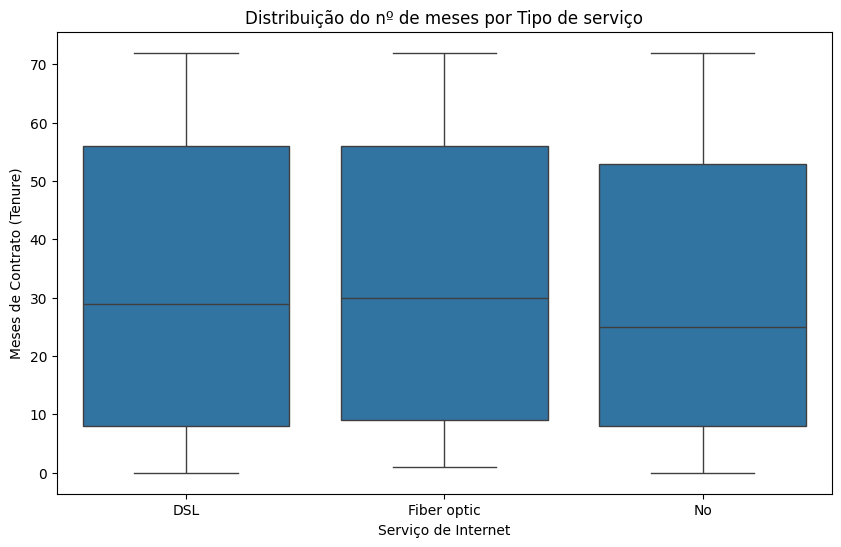

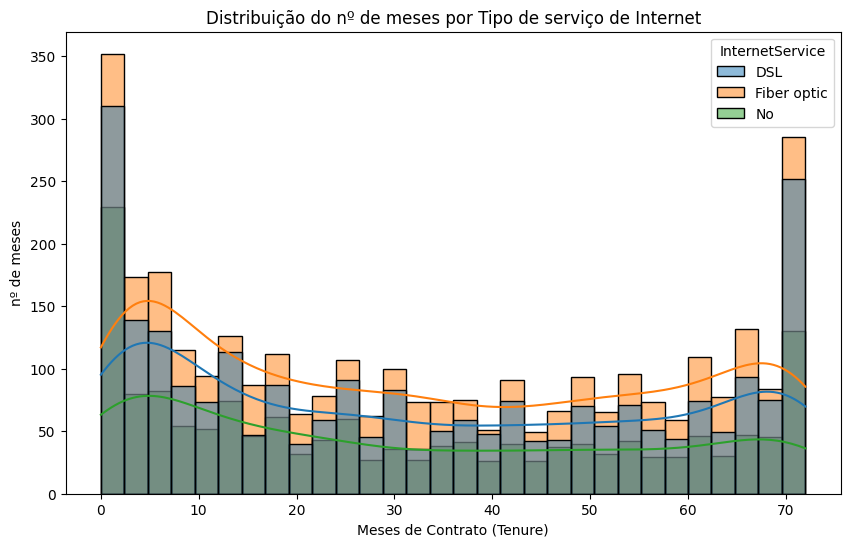

In [7]:
# Análise descritiva entre os atributos tenure  e InternetService com informações das medidas descritivas e gráfico boxplot e Histograma com KDE

import matplotlib.pyplot as plt
print("\nAnálise descritiva do nº de meses por Tipo de serviço:")
print(dados_telecom_x.groupby('InternetService')['tenure'].describe())

# Visualização: Boxplot ou Histograma/KDE por grupo de InternetService

# gráfico Boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x='InternetService', y='tenure', data=dados_telecom_x)
plt.title('Distribuição do nº de meses por Tipo de serviço')
plt.xlabel('Serviço de Internet')
plt.ylabel('Meses de Contrato (Tenure)')
plt.show()

# gráfico Histograma com KDE

plt.figure(figsize=(10, 6))
sns.histplot(data=dados_telecom_x, x='tenure', hue='InternetService', kde=True, bins=30)
plt.title('Distribuição do nº de meses por Tipo de serviço de Internet')
plt.xlabel('Meses de Contrato (Tenure)')
plt.ylabel('nº de meses')
plt.show()



Análise descritiva de gastos mensais por Gênero:
         count       mean        std    min     25%    50%    75%     max
gender                                                                   
Female  3592.0  65.143346  30.112419  18.40  35.750  70.55  89.85  118.75
Male    3675.0  64.306408  30.144682  18.25  35.125  70.05  89.90  118.35


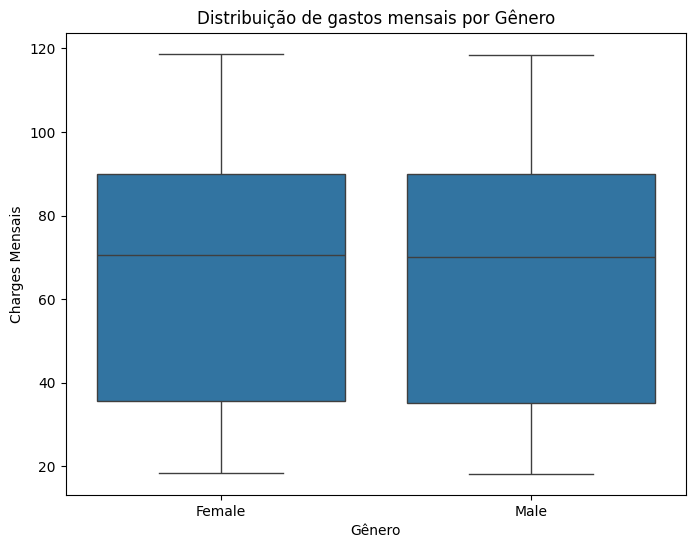

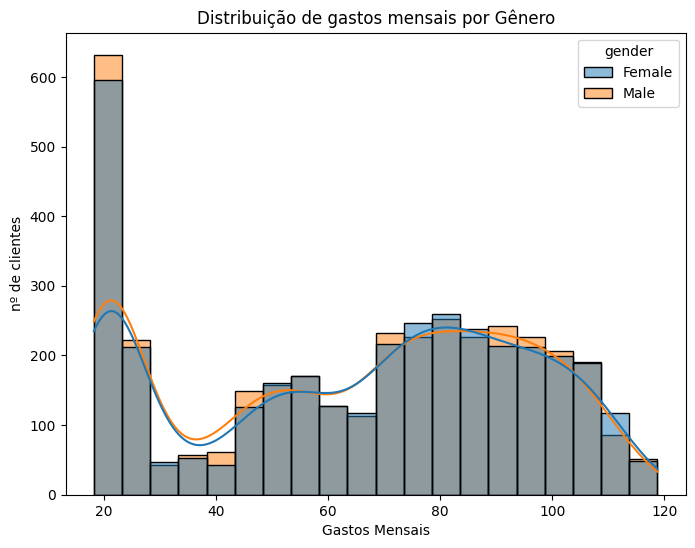

In [8]:
#Análise descritiva entre os atributos gender  e Changes.monthly

import matplotlib.pyplot as plt
# Análise descritiva entre gender e Charges.Monthly

print("\nAnálise descritiva de gastos mensais por Gênero:")
print(dados_telecom_x.groupby('gender')['Charges.Monthly'].describe())

# Sugestão de gráfico: Para comparar a distribuição de uma variável quantitativa (Charges.Monthly) entre duas categorias (gender), um **Boxplot** ou um **Histograma/KDE com cores separadas por gênero** são boas opções.

# Visualização com Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='Charges.Monthly', data=dados_telecom_x)
plt.title('Distribuição de gastos mensais por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Charges Mensais')
plt.show()

# Visualização com Histograma com KDE
plt.figure(figsize=(8, 6))
sns.histplot(data=dados_telecom_x, x='Charges.Monthly', hue='gender', kde=True, bins=20)
plt.title('Distribuição de gastos mensais por Gênero')
plt.xlabel('Gastos Mensais')
plt.ylabel('nº de clientes')
plt.show()



Análise descritiva de tempo de permanência por evasão
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
False  5398.0  37.321045  24.178367  0.0  14.0  37.0  61.0  72.0
True   1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


<ipython-input-9-2292189463>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ChurnStatus', data=dados_telecom_x, palette='viridis')


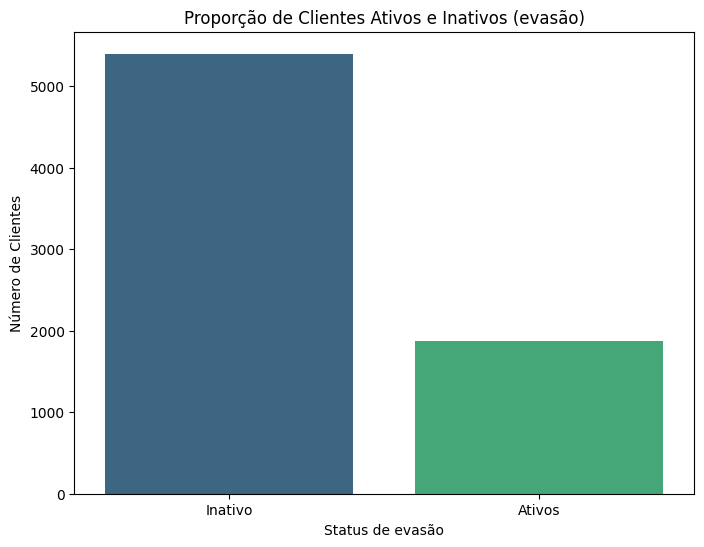

<ipython-input-9-2292189463>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ChurnStatus', y='tenure', data=dados_telecom_x, palette='viridis')


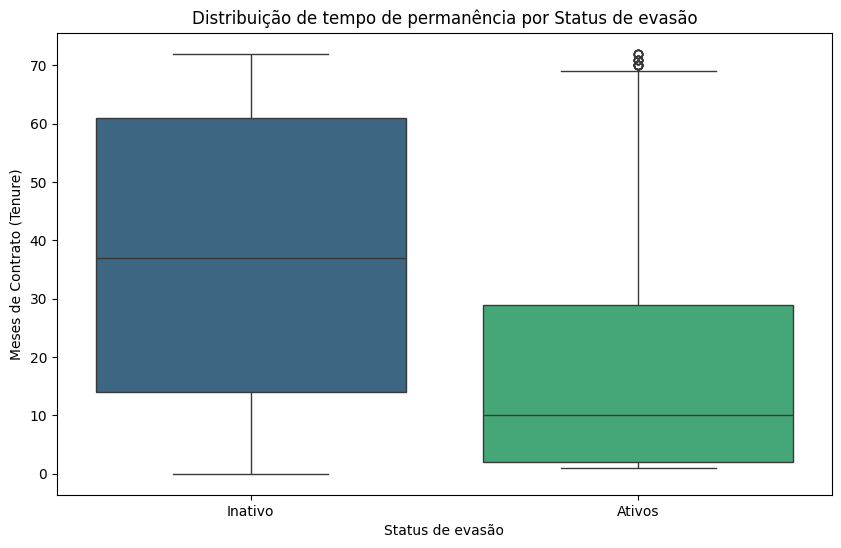

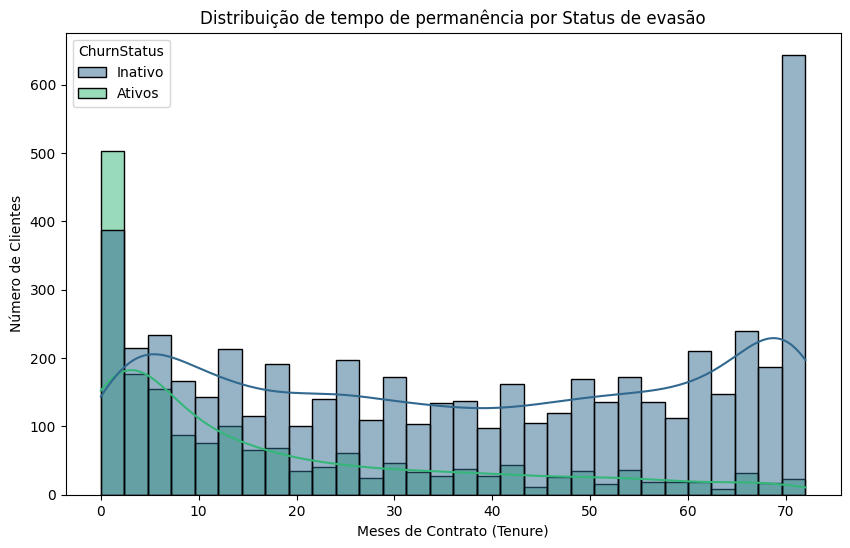

In [9]:
#  gráfico para visualizar a proporção de clientes que permaneceram(Churn=True) e os que saíram(Churn=True).

import matplotlib.pyplot as plt
# Criar uma coluna 'ChurnStatus' para mapear os valores booleanos para strings desejadas
dados_telecom_x['ChurnStatus'] = dados_telecom_x['Churn'].map({True: 'Ativos', False: 'Inativo'})

# Analise da distribuição de Churn em relação ao Tenure
print("\nAnálise descritiva de tempo de permanência por evasão")
print(dados_telecom_x.groupby('Churn')['tenure'].describe())

# Construir o gráfico para visualizar a proporção de clientes que permaneceram (Inativo) e os que saíram (Ativos)
plt.figure(figsize=(8, 6))
sns.countplot(x='ChurnStatus', data=dados_telecom_x, palette='viridis')
plt.title('Proporção de Clientes Ativos e Inativos (evasão)')
plt.xlabel('Status de evasão')
plt.ylabel('Número de Clientes')
plt.show()

# Construir o gráfico para visualizar a relação entre Churn e Tenure
plt.figure(figsize=(10, 6))
sns.boxplot(x='ChurnStatus', y='tenure', data=dados_telecom_x, palette='viridis')
plt.title('Distribuição de tempo de permanência por Status de evasão')
plt.xlabel('Status de evasão')
plt.ylabel('Meses de Contrato (Tenure)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=dados_telecom_x, x='tenure', hue='ChurnStatus', kde=True, bins=30, palette='viridis')
plt.title('Distribuição de tempo de permanência por Status de evasão')
plt.xlabel('Meses de Contrato (Tenure)')
plt.ylabel('Número de Clientes')
plt.show()


Análise da distribuição de evasão por Tipo de Contrato:
Status_evasao     Ativos   Inativo
Contract                          
Month-to-month  0.413233  0.586767
One year        0.109282  0.890718
Two year        0.027539  0.972461


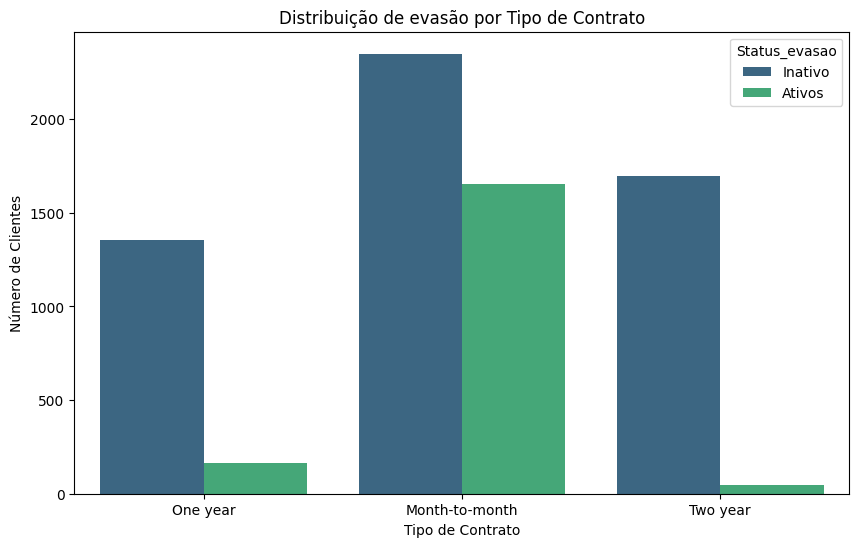

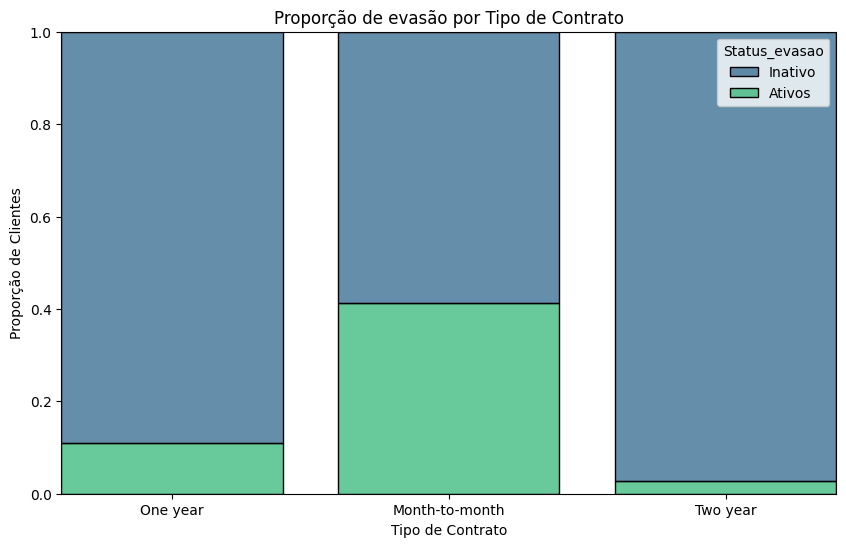

In [10]:
#gráfico para visualizar em relação ao Tipo de contrato(contract).

import pandas as pd
import matplotlib.pyplot as plt
# Criar uma coluna 'Status_evasao' para mapear os valores booleanos para strings desejadas
dados_telecom_x['Status_evasao'] = dados_telecom_x['Churn'].map({True: 'Ativos', False: 'Inativo'})

# Análise da coluna 'Churn' por 'Contract'
print("\nAnálise da distribuição de evasão por Tipo de Contrato:")
print(pd.crosstab(dados_telecom_x['Contract'], dados_telecom_x['Status_evasao'], normalize='index'))

# Construir o gráfico para visualizar a relação entre Churn e Contract
plt.figure(figsize=(10, 6))
sns.countplot(data=dados_telecom_x, x='Contract', hue='Status_evasao', palette='viridis')
plt.title('Distribuição de evasão por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()

# Opcional: Gráfico de barras empilhadas normalizado para proporção
plt.figure(figsize=(10, 6))
sns.histplot(data=dados_telecom_x, x='Contract', hue='Status_evasao', multiple='fill', shrink=0.8, palette='viridis')
plt.title('Proporção de evasão por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Proporção de Clientes')
plt.show()


Análise da distribuição de Churn por Método de Pagamento:
Status_evasao                Ativos   Inativo
PaymentMethod                                
Bank transfer (automatic)  0.162366  0.837634
Credit card (automatic)    0.147959  0.852041
Electronic check           0.438037  0.561963
Mailed check               0.184985  0.815015


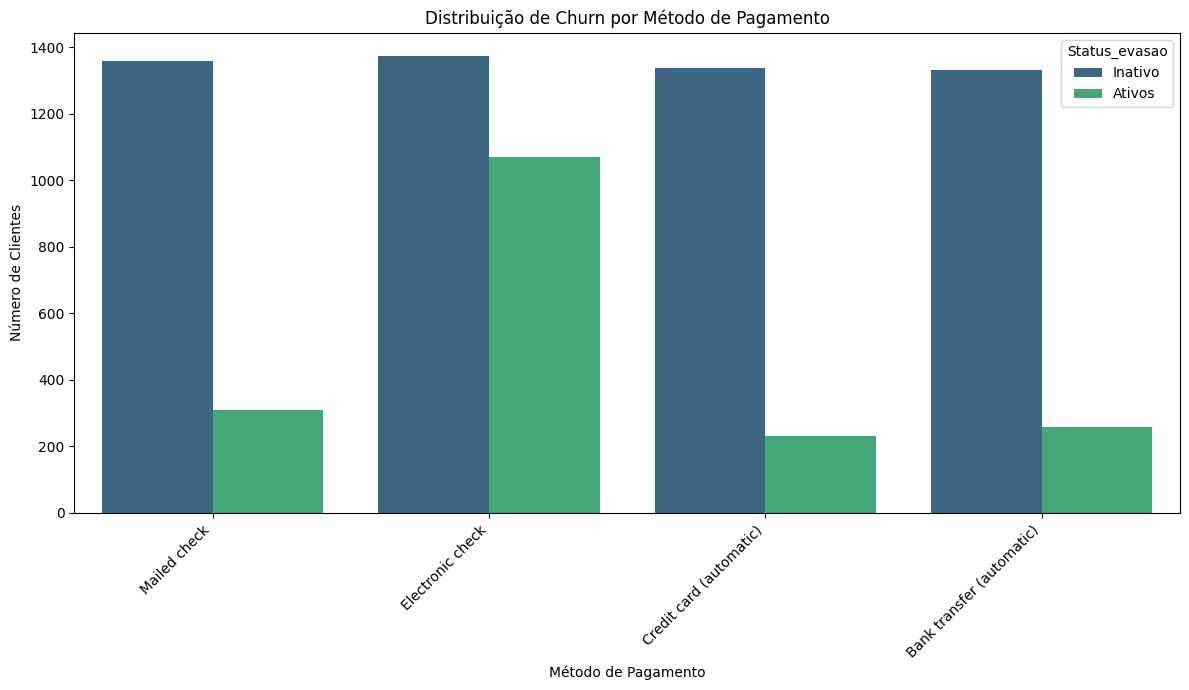

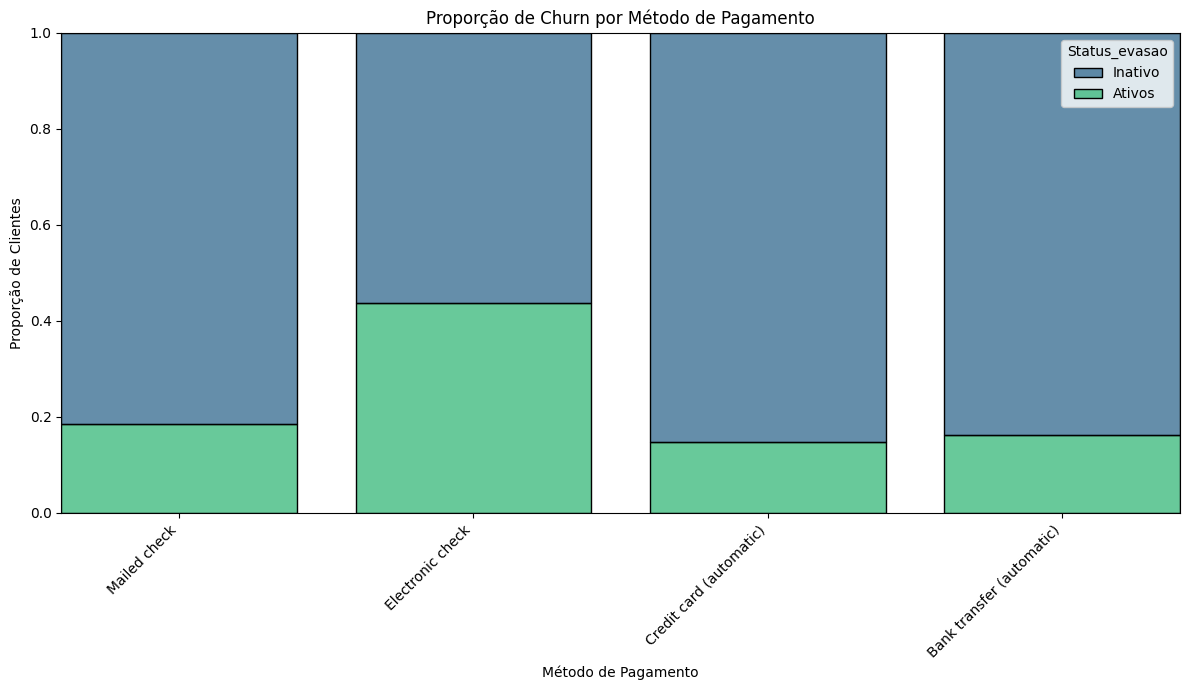

In [11]:
# gráfico para visualizar a proporção de clientes que permaneceram(Churn=True) e os que saíram(Churn=True) em relação ao método de pagamento(PaymentMethod).

import pandas as pd
import matplotlib.pyplot as plt
# Analise da coluna "churn" (evasão) e como ela está distribuída entre os clientes de acordo com o método de pagamento (PaymentMethod).
# Verificar se a coluna já existe para evitar erro caso o código anterior tenha sido executado
if 'Status_evasao' not in dados_telecom_x.columns:
  dados_telecom_x['Status_evasao'] = dados_telecom_x['Churn'].map({True: 'Ativos', False: 'Inativo'})

print("\nAnálise da distribuição de Churn por Método de Pagamento:")
print(pd.crosstab(dados_telecom_x['PaymentMethod'], dados_telecom_x['Status_evasao'], normalize='index'))

# Construir o gráfico para visualizar a relação entre Churn e PaymentMethod
plt.figure(figsize=(12, 7))
sns.countplot(data=dados_telecom_x, x='PaymentMethod', hue='Status_evasao', palette='viridis')
plt.title('Distribuição de Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right') # Rotacionar rótulos do eixo x para melhor leitura
plt.tight_layout() # Ajustar layout para evitar sobreposição
plt.show()

# Opcional: Gráfico de barras empilhadas normalizado para proporção
plt.figure(figsize=(12, 7))
sns.histplot(data=dados_telecom_x, x='PaymentMethod', hue='Status_evasao', multiple='fill', shrink=0.8, palette='viridis')
plt.title('Proporção de Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Proporção de Clientes')
plt.xticks(rotation=45, ha='right') # Rotacionar rótulos do eixo x para melhor leitura
plt.tight_layout() # Ajustar layout para evitar sobreposição
plt.show()

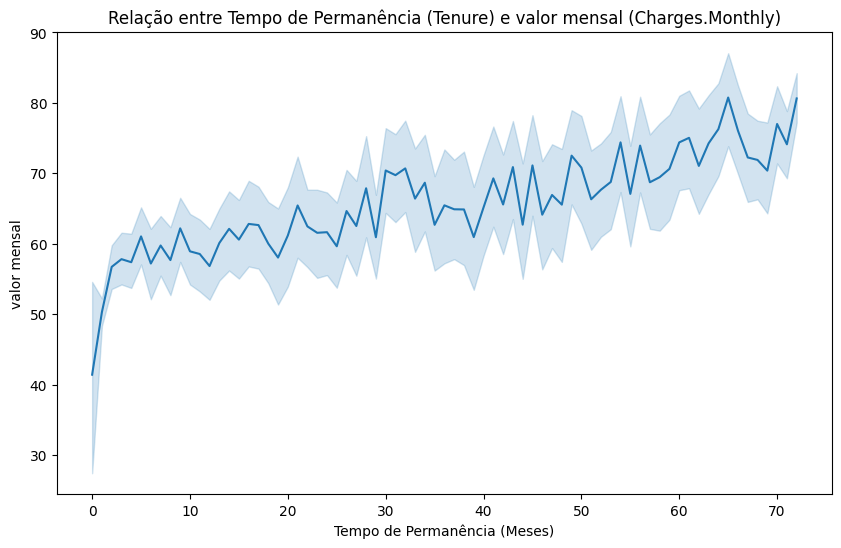

In [12]:
# gráfico de linhas para visualizar o tempo de permanencia(tenure) e o valor mensal( Charges.Monthly)

import matplotlib.pyplot as plt
# Gráfico de linhas para visualizar a relação entre tenure e Charges.Total
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_telecom_x, x='tenure', y='Charges.Monthly')
plt.title('Relação entre Tempo de Permanência (Tenure) e valor mensal (Charges.Monthly)')
plt.xlabel('Tempo de Permanência (Meses)')
plt.ylabel('valor mensal')
plt.show()

In [ ]:
# exportar dados no format csv.
#dados_telecom_x.to_csv('dados_telecom_x.csv', index=False)

#📄Relatorio Final

**Relatório Técnico**

Este relatório tem como objetivo analisar os dados da empresa Telecom X, que vem enfrentando problemas relacionados à evasão de clientes. Neste trabalho, foram realizadas a importação, o tratamento e a adequação dos dados, possibilitando a identificação dos possíveis fatores que contribuem para a perda de clientes.

A análise foi conduzida utilizando a linguagem Python.

Na etapa de limpeza e tratamento dos dados, foi realizada a importação do arquivo fornecido no formato JSON, que deu origem ao dataset dados_telecom_x. Em seguida, procedeu-se à expansão (normalização) dos atributos aninhados. Após essa etapa, foi feito o reconhecimento da base de dados e, posteriormente, a conversão dos atributos do tipo object para tipos mais adequados, como string, bool, int64 e float64.

A análise revelou que a Telecom X apresenta uma taxa de evasão de quase 75%. O grupo etário adulto representa 83,7% dos clientes e também gera a maior parte do faturamento da empresa. Observou-se que o tempo médio de permanência é maior entre os usuários do serviço de internet via fibra óptica. Constatou-se ainda que há pouca variação nos gastos mensais entre os gêneros, que o tipo de contrato mais adotado é o mensal, que a evasão é menor entre clientes que utilizam o pagamento via electronic check e que os clientes com maior tempo de permanência tendem a ter valores mensais mais altos.

Considerando todos os dados analisados, conclui-se que a empresa possivelmente está perdendo clientes devido ao alto valor das mensalidades em comparação com os concorrentes. Isso é evidenciado pelo fato de que os clientes mais antigos pagam, em média, valores mais elevados do que os novos. Também foi identificado que os idosos são minoria entre os clientes, que a internet via fibra óptica proporciona maior satisfação e que a evasão é menor entre os usuários do método de pagamento electronic check.

Diante disso, recomenda-se que a empresa considere criar pacotes de dados com tecnologia de fibra óptica a preços mais competitivos, além de oferecer vantagens para clientes que firmarem contratos de longa duração e utilizarem métodos de pagamento que proporcionem benefícios tanto para a empresa quanto para o consumidor. Com essas estratégias, acredita-se ser possível reverter o cenário atual, conforme demonstrado pelos dados analisados.


Gráficos analisados:

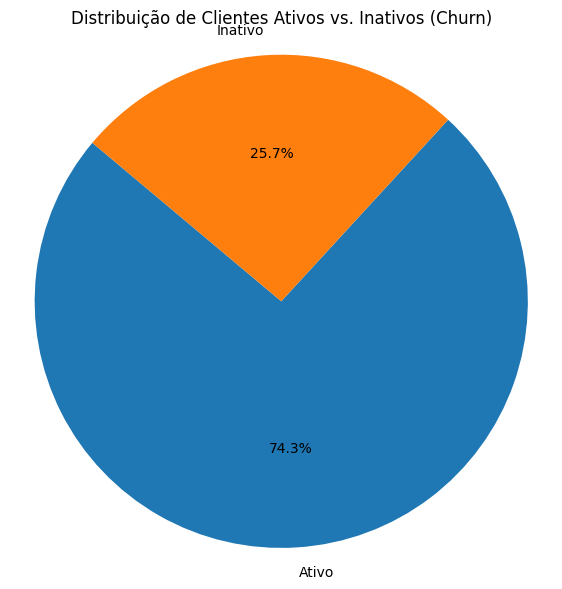


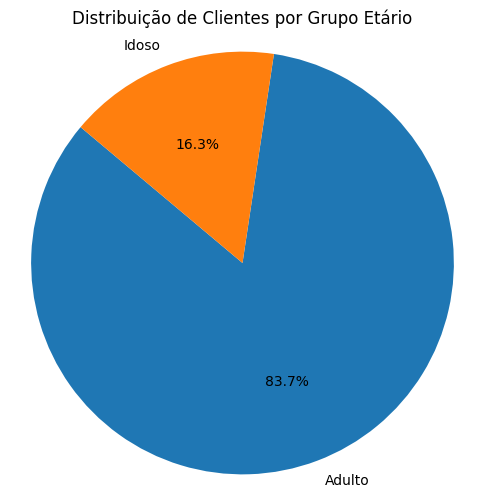


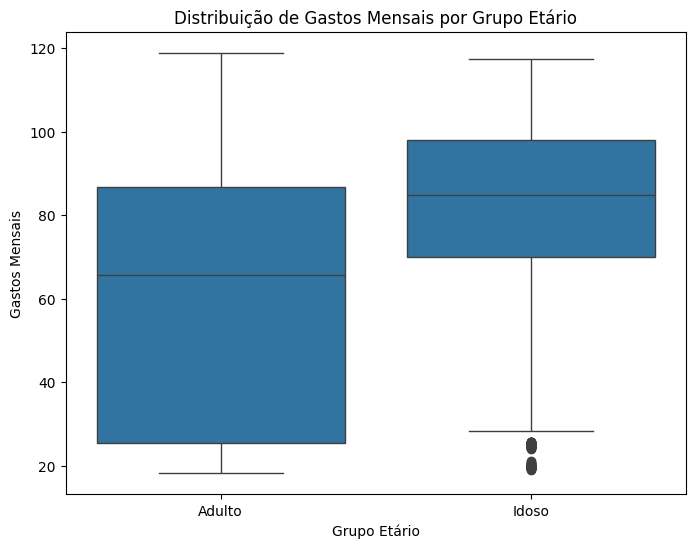

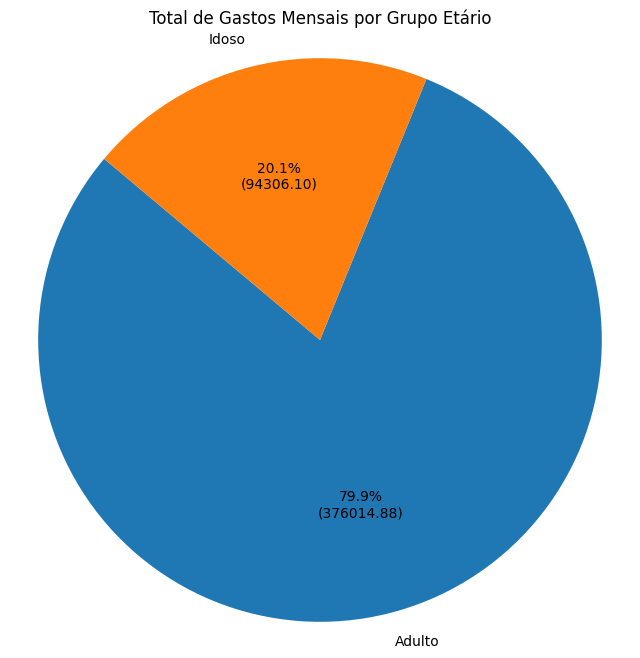

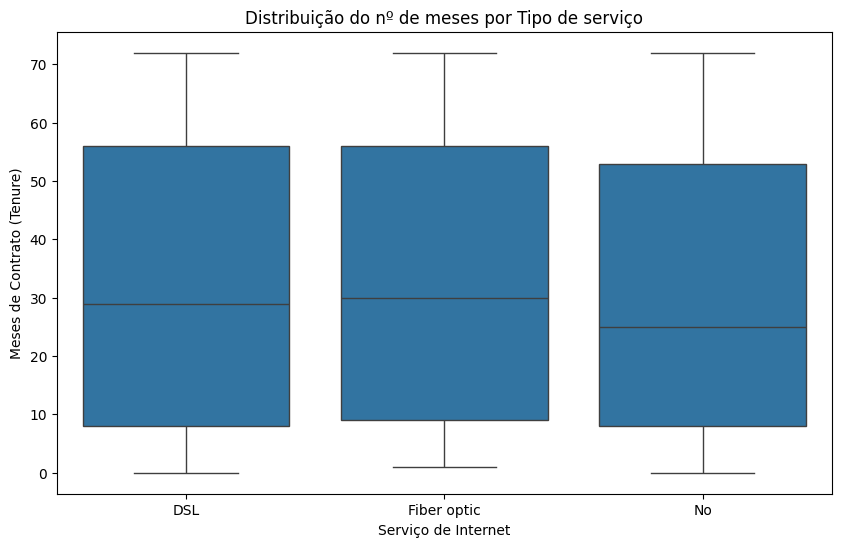

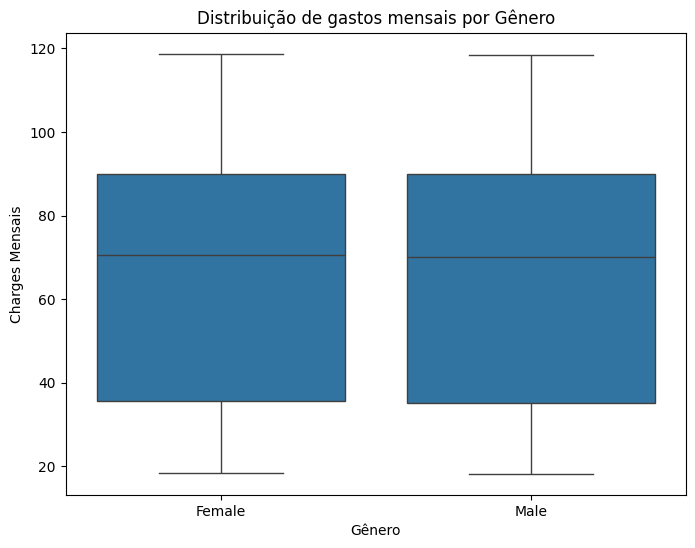


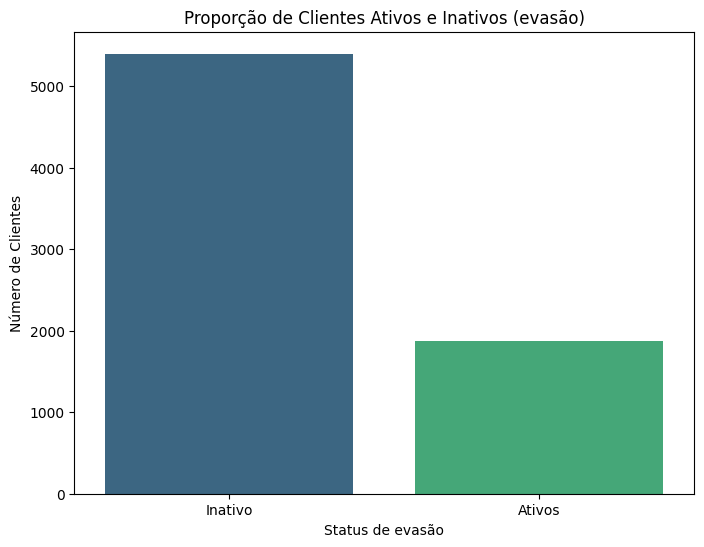


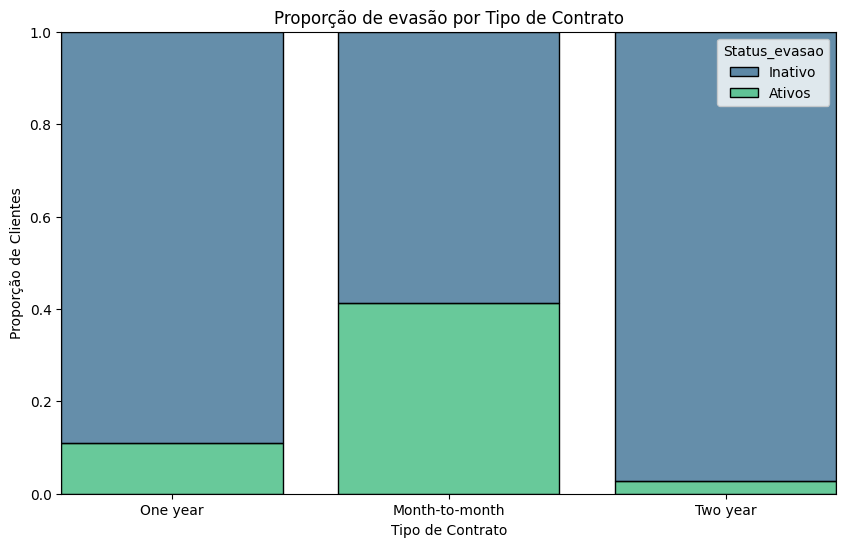


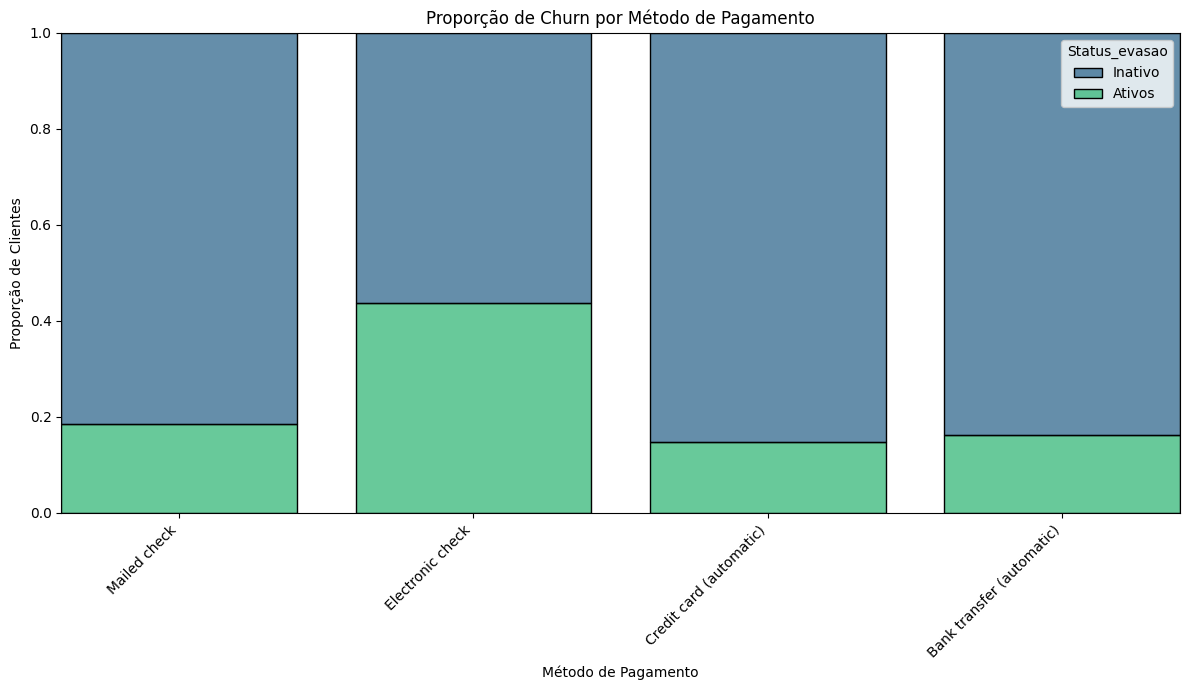

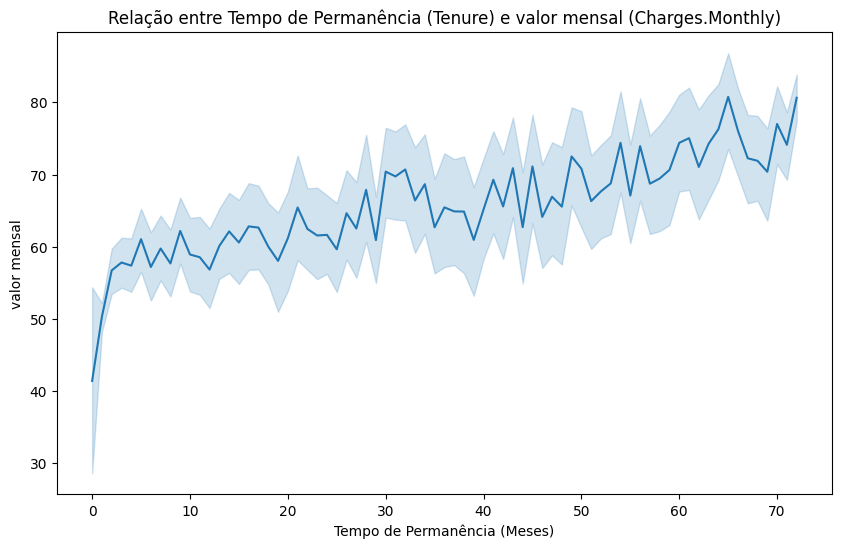

